## Imports

In [1]:
import os
import sys
import sklearn
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import accuracy_score

## Data

In [2]:
# Load in data

in_file_path = os.path.join(os.getcwd(), 'Data//Isolated', 'input.txt')
out_file_path = os.path.join(os.getcwd(), 'Data//Isolated', 'output.txt')

inp = pd.read_csv(in_file_path,sep="	",header=None)
out = pd.read_csv(out_file_path,sep="	",header=None)
out_save = out.copy()

In [3]:
out=out_save.copy()
a=out.copy()
b=out.copy()
a=a.iloc[:,0:88]
b=b.iloc[:,100]
out=pd.concat([a,b],axis=1,ignore_index=True)

In [4]:
display(inp.iloc[0:10,:])

,0,1,2,3,4,5,6,7,8,9,...,386,387,388,389,390,391,392,393,394,395
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,2.251939,4.503877,4.503877,5.267735,5.267735,5.267735,5.267735,5.267735,5.267735,...,3.732886,3.379731,3.444591,2.619926,2.617579,2.536714,1.753817,1.576958,1.459010,1.266897
2,0,3.096148,6.192296,6.192296,6.878340,6.878340,6.878340,6.878340,6.878340,6.878340,...,1.640871,1.772594,1.821867,1.578366,1.714497,1.358405,1.881643,1.843069,1.829970,1.540454
3,0,2.584332,5.168665,5.168665,7.360459,7.360459,7.360459,7.360459,7.360459,7.360459,...,0.594425,-0.334698,-0.430611,0.502820,0.068937,0.143158,0.118356,0.072981,-0.281706,0.075947
4,0,3.000714,6.001429,6.001429,6.701647,6.701647,6.701647,6.701647,6.701647,6.701647,...,-0.623231,0.371712,0.470023,0.162091,0.221460,0.250500,0.530187,0.159522,0.305749,0.009385
5,0,2.751009,5.502019,5.502019,6.621682,6.621682,6.621682,6.621682,6.621682,6.621682,...,0.633103,0.263561,-0.168876,0.346169,-0.440816,0.384683,-0.051109,0.221751,0.035686,0.602832
6,0,2.642939,5.285878,5.285878,6.867776,6.867776,6.867776,6.867776,6.867776,6.867776,...,-0.890348,-0.869460,-0.617617,-0.647156,-0.466353,-0.895708,-0.513983,-1.051126,-0.645904,-1.380035
7,0,2.371071,4.742141,4.742141,7.653968,7.653968,7.653968,7.653968,7.653968,7.653968,...,0.084704,0.522521,0.457197,0.300003,0.246175,0.269324,0.340245,0.608106,0.927223,1.058712
8,0,2.403097,4.806194,4.806194,4.775225,4.775225,4.775225,4.775225,4.775225,4.775225,...,0.332082,0.043317,-0.011749,-0.175405,1.035872,0.576066,0.032425,0.454823,0.370297,0.560443
9,0,2.462601,4.925202,4.925202,5.128348,5.128348,5.128348,5.128348,5.128348,5.128348,...,0.251075,0.582727,0.905515,0.560194,0.005657,0.148847,0.304870,0.414894,-0.168880,-0.491118


In [5]:
display(out.iloc[0:10,:])

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Get some info

In [6]:
count_empty = np.sum(out.iloc[:,out.shape[1]-1],axis=0)
count_not_empty = out.shape[0] - count_empty
print('Empty instances:',count_empty)
print('Not empty instances:',count_not_empty)


Empty instances: 10402
Not empty instances: 8785


In [7]:
only_notes=out.iloc[:,0:out.shape[1]-1]
count_notes = np.sum(only_notes,axis=1)
single_note_idx = np.where(count_notes==1)[0]
count_notes_hot = pd.get_dummies(count_notes)
out_hot=pd.concat([only_notes,count_notes_hot],axis=1,ignore_index=True).iloc[:,0:90]
display(out_hot.iloc[0:10,:])

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
empty = out_hot.iloc[:,out.shape[1]-1].get_values()
empty_idx = np.where(empty==1)[0]
not_empty_idx = np.where(empty==0)[0]

# How many empty?
num_empty = 200

# Get random empty index
ii = random.sample(range(0,empty_idx.shape[0]),num_empty)
rand_empty_idx = empty_idx[ii]

# Get single notes
i1 = np.intersect1d(not_empty_idx,single_note_idx)

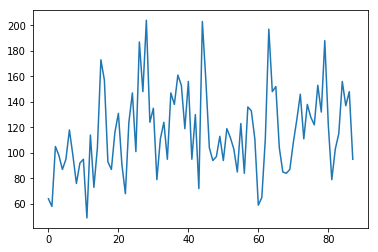

In [9]:
plt.plot(np.sum(out.iloc[:,0:out.shape[1]-1],axis=0))

In [34]:
# Split no note info
X_n = pd.concat([inp.iloc[i1,:],inp.iloc[rand_empty_idx,:]],axis=0,ignore_index=True)
y_n = pd.concat([out.iloc[i1,0:out.shape[1]-1],out.iloc[rand_empty_idx,0:out.shape[1]-1]],axis=0,ignore_index=True)
X_train_n,X_test_n,y_train_n,y_test_n = train_test_split(X_n,y_n,train_size=0.80,test_size=0.20)
print('X_train_n shape:',X_train_n.shape)
print('y_train_n shape:',y_train_n.shape)
print('X_test_n shape:',X_test_n.shape)
print('y_test_n shape:',y_test_n.shape)

X_train_n shape: (6008, 396)
y_train_n shape: (6008, 88)
X_test_n shape: (1503, 396)
y_test_n shape: (1503, 88)


In [11]:
# Split with empty
X_e = pd.concat([inp.iloc[i1,:],inp.iloc[rand_empty_idx,:]],axis=0,ignore_index=True)
y_e = pd.concat([out.iloc[i1,:],out.iloc[rand_empty_idx,:]],axis=0,ignore_index=True)
X_train_e,X_test_e,y_train_e,y_test_e = train_test_split(X_e,y_e,train_size=0.80,test_size=0.20)
print('X_train_e shape:',X_train_e.shape)
print('y_train_e shape:',y_train_e.shape)
print('X_test_e shape:',X_test_e.shape)
print('y_test_e shape:',y_test_e.shape)

X_train_e shape: (6008, 396)
y_train_e shape: (6008, 89)
X_test_e shape: (1503, 396)
y_test_e shape: (1503, 89)


In [12]:
# Split note one_hot
X_h = pd.concat([inp.iloc[i1,:],inp.iloc[rand_empty_idx,:]],axis=0,ignore_index=True)
y_h = pd.concat([out_hot.iloc[i1,:],out_hot.iloc[rand_empty_idx,:]],axis=0,ignore_index=True)
X_train_h,X_test_h,y_train_h,y_test_h = train_test_split(X_h,y_h,train_size=0.80,test_size=0.20)
print('X_train_h shape:',X_train_h.shape)
print('y_train_h shape:',y_train_h.shape)
print('X_test_h shape:',X_test_h.shape)
print('y_test_h shape:',y_test_h.shape)
print('y_h shape:',y_h.shape)

X_train_h shape: (6008, 396)
y_train_h shape: (6008, 90)
X_test_h shape: (1503, 396)
y_test_h shape: (1503, 90)
y_h shape: (7511, 90)


## Training

In [35]:
# Single layer, no note info
model_s_n = keras.Sequential()
model_s_n.add(keras.layers.Dense(units=out.shape[1]-1, activation='relu',input_dim=X_n.shape[1]))
model_s_n.add(keras.layers.Dense(units=out.shape[1]-1, activation='softmax'))
model_s_n.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])
model_s_n.fit(X_train_n,y_train_n,epochs=50, batch_size=32)
print('Done')

Epoch 1/50
6008/6008 [==============================] - 1s 119us/step - loss: 4.3353 - acc: 0.0343
Epoch 2/50
6008/6008 [==============================] - 0s 77us/step - loss: 3.9254 - acc: 0.0877
Epoch 3/50
6008/6008 [==============================] - 0s 77us/step - loss: 3.4858 - acc: 0.1849
Epoch 4/50
6008/6008 [==============================] - 0s 73us/step - loss: 3.0472 - acc: 0.2831
Epoch 5/50
6008/6008 [==============================] - 0s 73us/step - loss: 2.6643 - acc: 0.3745
Epoch 6/50
6008/6008 [==============================] - 0s 72us/step - loss: 2.3485 - acc: 0.4368
Epoch 7/50
6008/6008 [==============================] - 0s 76us/step - loss: 2.0878 - acc: 0.5012
Epoch 8/50
6008/6008 [==============================] - 0s 72us/step - loss: 1.8763 - acc: 0.5343
Epoch 9/50
6008/6008 [==============================] - 1s 108us/step - loss: 1.7050 - acc: 0.5766
Epoch 10/50
6008/6008 [==============================] - 1s 111us/step - loss: 1.5607 - acc: 0.6039
Epoch 11/50
6008

In [14]:
# Single layer, with empty
model_s_e = keras.Sequential()
model_s_e.add(keras.layers.Dense(units=out.shape[1], activation='relu',input_dim=X_e.shape[1]))
model_s_e.add(keras.layers.Dense(units=out.shape[1], activation='softmax'))
model_s_e.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])
model_s_e.fit(X_train_e,y_train_e,epochs=50, batch_size=32)
print('Done')

Epoch 1/50
6008/6008 [==============================] - 1s 115us/step - loss: 4.4043 - acc: 0.0458
Epoch 2/50
6008/6008 [==============================] - 0s 78us/step - loss: 3.9853 - acc: 0.1163
Epoch 3/50
6008/6008 [==============================] - 1s 87us/step - loss: 3.5466 - acc: 0.2091
Epoch 4/50
6008/6008 [==============================] - 0s 75us/step - loss: 3.1330 - acc: 0.2993
Epoch 5/50
6008/6008 [==============================] - 0s 55us/step - loss: 2.7590 - acc: 0.3813
Epoch 6/50
6008/6008 [==============================] - 1s 85us/step - loss: 2.4394 - acc: 0.4487
Epoch 7/50
6008/6008 [==============================] - 0s 70us/step - loss: 2.1751 - acc: 0.5098
Epoch 8/50
6008/6008 [==============================] - 0s 63us/step - loss: 1.9656 - acc: 0.5504
Epoch 9/50
6008/6008 [==============================] - 0s 67us/step - loss: 1.7845 - acc: 0.5952
Epoch 10/50
6008/6008 [==============================] - 0s 64us/step - loss: 1.6417 - acc: 0.6200
Epoch 11/50
6008/6

In [15]:
# Single layer, one hot encoding for notes
model_s_h = keras.Sequential()
model_s_h.add(keras.layers.Dense(units=y_h.shape[1], activation='relu',input_dim=X_h.shape[1]))
model_s_h.add(keras.layers.Dense(units=y_h.shape[1], activation='softmax'))
model_s_h.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])
model_s_h.fit(X_train_h,y_train_h,epochs=50, batch_size=32)

Epoch 1/50
6008/6008 [==============================] - 1s 114us/step - loss: 6.2648 - acc: 1.6644e-04
Epoch 2/50
6008/6008 [==============================] - 0s 82us/step - loss: 5.6306 - acc: 0.0000e+00
Epoch 3/50
6008/6008 [==============================] - 0s 72us/step - loss: 5.1904 - acc: 8.3222e-04
Epoch 4/50
6008/6008 [==============================] - 0s 72us/step - loss: 4.7703 - acc: 0.0095
Epoch 5/50
6008/6008 [==============================] - 0s 71us/step - loss: 4.4019 - acc: 0.0306
Epoch 6/50
6008/6008 [==============================] - 0s 72us/step - loss: 4.0908 - acc: 0.0573
Epoch 7/50
6008/6008 [==============================] - 0s 74us/step - loss: 3.8501 - acc: 0.0826
Epoch 8/50
6008/6008 [==============================] - 0s 67us/step - loss: 3.6205 - acc: 0.1015
Epoch 9/50
6008/6008 [==============================] - 0s 72us/step - loss: 3.4532 - acc: 0.1295
Epoch 10/50
6008/6008 [==============================] - 0s 72us/step - loss: 3.3069 - acc: 0.1375
Epoch 

In [36]:
y_pred_n = model_s_n.predict(X_test_n,batch_size=32)
y_pred_e = model_s_e.predict(X_test_e,batch_size=32)
y_pred_h = model_s_h.predict(X_test_h,batch_size=32)
threshold = 0.4

## Method 1

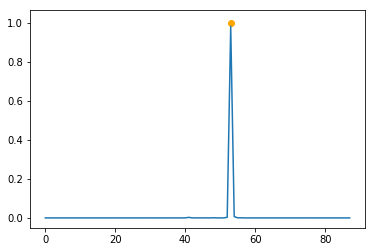

Predicted: 53
Actual: 53


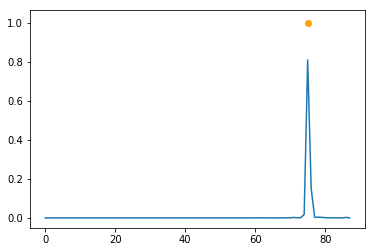

Predicted: 75
Actual: 75


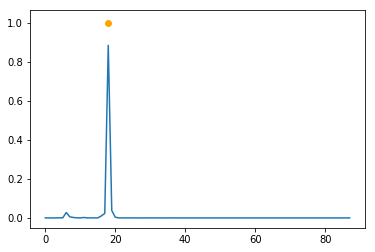

Predicted: 18
Actual: 18


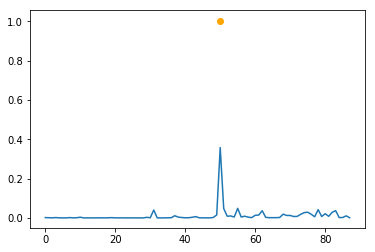

Predicted: 50
Actual: 50


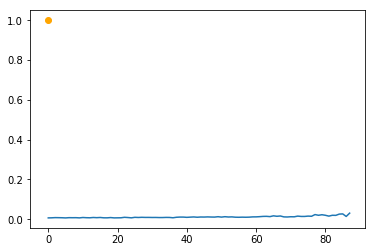

Predicted: 87
Actual: 0


In [42]:
for i in range(5):
    plt.plot(y_pred_n[i])
    x1=np.argmax(y_test_n.iloc[i,:])
    y1=1
    plt.scatter(x=x1,y=y1,c='orange')
    
    plt.show()
    
    print('Predicted:',np.argmax(y_pred_n[i,:]))
    print('Actual:',np.argmax(y_test_n.iloc[i,:]))

In [38]:
threshold_pred_n = y_pred_n.copy()
threshold_pred_n[threshold_pred_n<threshold]=0
threshold_pred_n[threshold_pred_n>=threshold]=1

In [64]:
j=0
for i in range(y_pred_n.shape[0]):
    a=y_test_n.iloc[i,:].get_values()
    if (np.array_equal(a,threshold_pred_n[i,:])):
        j=j+1
print('General accuracy:',j/y_test_n.shape[0])

General accuracy: 0.7711244178310046


In [43]:
j=0
k=0
for i in range(y_pred_n.shape[0]):
    a=y_test_n.iloc[i,:].get_values()
    if (np.array_equal(a,np.zeros(y_test_n.shape[1]))):
        k=k+1
        if (np.array_equal(a,threshold_pred_n[i,:])):
            j=j+1

acc_empty_n=j/k
print('Acc empty:',acc_empty_n)

Acc empty: 0.7884615384615384


In [46]:
j=0
k=0
for i in range(y_pred_n.shape[0]):
    a=y_test_n.iloc[i,:].get_values()
    if (not np.array_equal(a,np.zeros(y_test_n.shape[1]))):
        k=k+1
        if (np.array_equal(a,threshold_pred_n[i,:])):
            j=j+1
        
acc_notes_n=j/k
print('Acc non empty:',acc_notes_n)

Acc non empty: 0.7705031013094418


## Method 2

Predicted: 14
Actual: 88


/afs/inf.ed.ac.uk/user/s17/s1709221/miniconda3/envs/py3amt/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


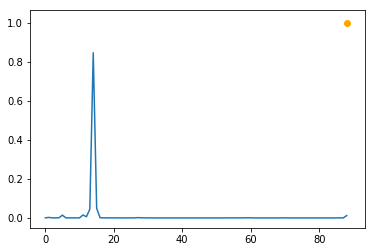

Predicted: 59
Actual: 59


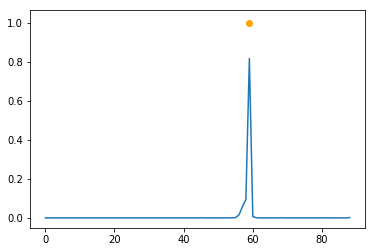

Predicted: 49
Actual: 49


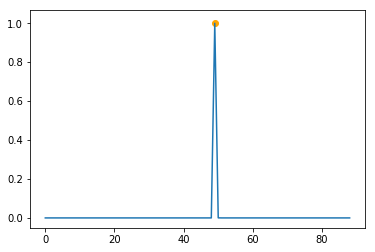

Predicted: 38
Actual: 39


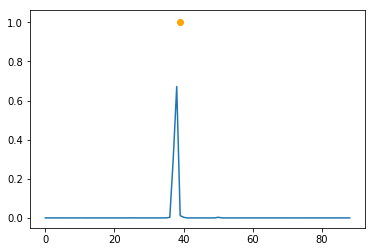

Predicted: 86
Actual: 88


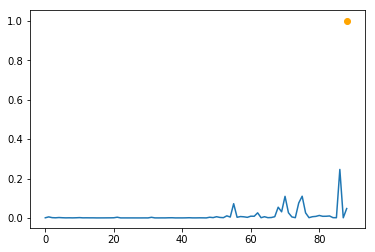

In [128]:
for i in range(5):
    plt.plot(y_pred_e[i])
    x1=np.argmax(y_test_e.iloc[i,:])
    y1=1
    plt.scatter(x=x1,y=y1,c='orange')
    print('Predicted:',np.argmax(y_pred_e[i,:]))
    print('Actual:',np.argmax(y_test_e.iloc[i,:]))
    plt.show()

In [89]:
a = y_pred_e.copy()
threshold_pred_e = np.zeros_like(a)
threshold_pred_e[np.arange(len(a)),a.argmax(1)]=1
threshold_pred_e

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [90]:
j=0
for i in range(y_pred_e.shape[0]):
    a=y_test_e.iloc[i,:].get_values()
    if (np.array_equal(a,threshold_pred_e[i,:])):
        j=j+1
print('General accuracy:',j/y_test_e.shape[0])

General accuracy: 0.8196939454424484


In [100]:
j=0
k=0
for i in range(y_pred_e.shape[0]):
    a=y_test_e.iloc[i,:].get_values()
    if (a[a.shape[0]-1]==1):
        k=k+1
        if (np.array_equal(a,threshold_pred_e[i,:])):
            j=j+1

acc_empty_e=j/k
print(j)
print(k)
print('Acc empty:',acc_empty_e)

22
40
Acc empty: 0.55


In [106]:
j=0
k=0
for i in range(y_pred_e.shape[0]):
    a=y_test_e.iloc[i,:].get_values()
    if (a[a.shape[0]-1]==0):
        k=k+1
        if (np.array_equal(a,threshold_pred_e[i,:])):
            j=j+1
        
acc_notes_e=j/k
print(j)
print(k)
print('Acc non empty:',acc_notes_e)

1210
1463
Acc non empty: 0.8270676691729323


## Method 3

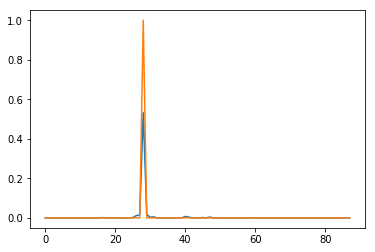

Predicted: 28
Actual: 28


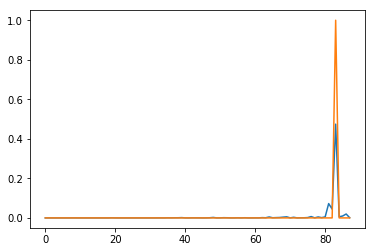

Predicted: 83
Actual: 83


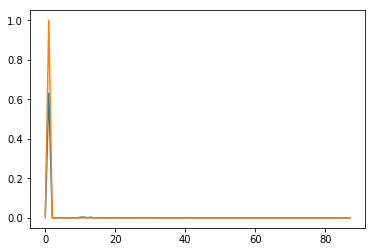

Predicted: 1
Actual: 1


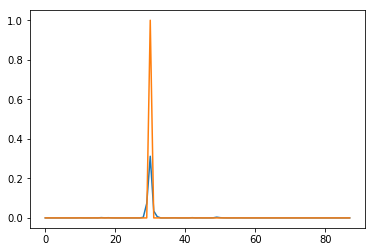

Predicted: 30
Actual: 30


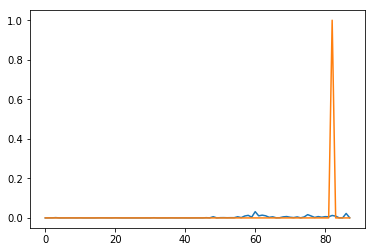

Predicted: 60
Actual: 82


In [143]:
for i in range(5):
    if (y_pred_h[i,88]<y_pred_h[i,89]):
        plt.plot(y_pred_h[i,0:88])
        plt.plot(y_test_h.iloc[i,0:88])
        plt.show()
        print('Predicted:',np.argmax(y_pred_h[i,0:88]))
        print('Actual:',np.argmax(y_test_h.iloc[i,0:88]))
    
    else:
        plt.plot(y_pred_h[i,0:88])
        plt.plot(y_test_h.iloc[i,0:88])
        plt.show()
        print('Predicted: 88',)
        print('Actual:',np.argmax(y_test_h.iloc[i,:]))

In [146]:
a=threshold_pred_h[0].copy()
max_val = np.max(a)
a[np.where(a==np.max(a))] = 1
a[np.where(a!=1)] = 0
a

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [147]:
num_pred = y_pred_h.copy()
threshold_pred_h = y_pred_h.copy()[:,0:88]
num_pred = num_pred[:,88:num_pred.shape[1]]

num_pred_bin = np.zeros_like(num_pred)
num_pred_bin[np.arange(len(num_pred)),num_pred.argmax(1)]=1

for i in range(y_test_h.shape[0]):
    if (num_pred_bin[i,0]==1):
        threshold_pred_h[i,:] = np.zeros(88)
    else:
        a=threshold_pred_h[i].copy()
        max_val = np.max(a)
        a[np.where(a==np.max(a))] = 1
        a[np.where(a!=1)] = 0
        threshold_pred_h[i,:]=a
        
        
threshold_pred_h

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [157]:
j=0
for i in range(y_pred_h.shape[0]):
    a=y_test_h.iloc[i,0:88].get_values()
    if (np.array_equal(a,threshold_pred_h[i,:])):
        j=j+1
print('General accuracy:',j/y_test_h.shape[0])

General accuracy: 0.8110445775116434


In [153]:
j=0
k=0
for i in range(y_pred_h.shape[0]):
    a=y_test_h.iloc[i,0:88].get_values()
    if (np.array_equal(a,np.zeros(88))):
        k=k+1
        if (np.array_equal(a,threshold_pred_h[i,:])):
            j=j+1
print(k)
print(j)
acc_empty_h=j/k
print('Acc empty:',acc_empty_h)

47
11
Acc empty: 0.23404255319148937


In [156]:
j=0
k=0
for i in range(y_pred_h.shape[0]):
    a=y_test_h.iloc[i,0:88].get_values()
    if (not np.array_equal(a,np.zeros(88))):
        k=k+1
        if (np.array_equal(a,threshold_pred_h[i,:])):
            j=j+1
        
acc_notes_h=j/k
print('Acc non empty:',acc_notes_h)

Acc non empty: 0.8296703296703297
